# CarDekho Price Prediction
***About Car Dehko***

CarDekho is a prominent Indian automotive technology company headquartered in Jaipur, Rajasthan.
Founded in 2008 by brothers Amit Jain and Anurag Jain, the platform assists users in buying and 
sellingcars by providing comprehensive automotive content, including expert reviews, detailed 
specifications,pricing comparisons, and multimedia content for various car brands andmodels
available in India.

***Dataset Overview***

***The dataset contains the following columns:***

***car_name:*** Name of the car

***brand:*** Car brand

***model:*** Car model

***vehicle_age:*** Age of the vehicle in years

***km_driven:*** Total kilometers driven

***seller_type:*** Type of seller (Individual or Dealer)

***fuel_type:*** Type of fuel (Petrol, Diesel, etc.)

***transmission_type:*** Manual or Automatic

***mileage:*** Mileage of the car

***engine:*** Engine capacity (in cc)

***max_power:*** Maximum power output

***seats:*** Number of seats

***selling_price:*** Price at which the car was sold

***Problem Statement:***

The used car market in India is a dynamic and ever-changing landscape. 
Prices can fluctuate wildly based on a variety of factors including the 
make and model of the car,its mileage, its condition and the current 
market conditions. As a result, it can be difficult for sellers to 
accurately price their cars.

***Approach:***

We propose to develop a machine learning model that can predict the price of a
used car based on its features. The model will be trained on a dataset of used
cars that have been sold on Cardekho.com in India.The model will then be able to
be used to predict the price of any used car, given its features.

***Objective***

To build suitable Machine Learning Model for Used Car Price Prediction.

***Benefits:***

The benefits of this solution include:

Sellers will be able to more accurately price their cars which will help them to sell their cars faster and for a higher price.

Buyers will be able to find cars that are priced more competitively.

The overall used car market in India will become more efficient.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv("Cardekho.csv")
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [4]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB
None
        car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti    

In [5]:
# Handling missing values
df.dropna(inplace=True)

In [6]:
# Encoding categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
# Splitting data
X = df.drop(columns=['selling_price'])  # Assuming 'Price' is the target column
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MAE: 99264.66682291472
MSE: 44451792219.313156
RMSE: 210835.9367359207
R² Score: 0.9409499634804136


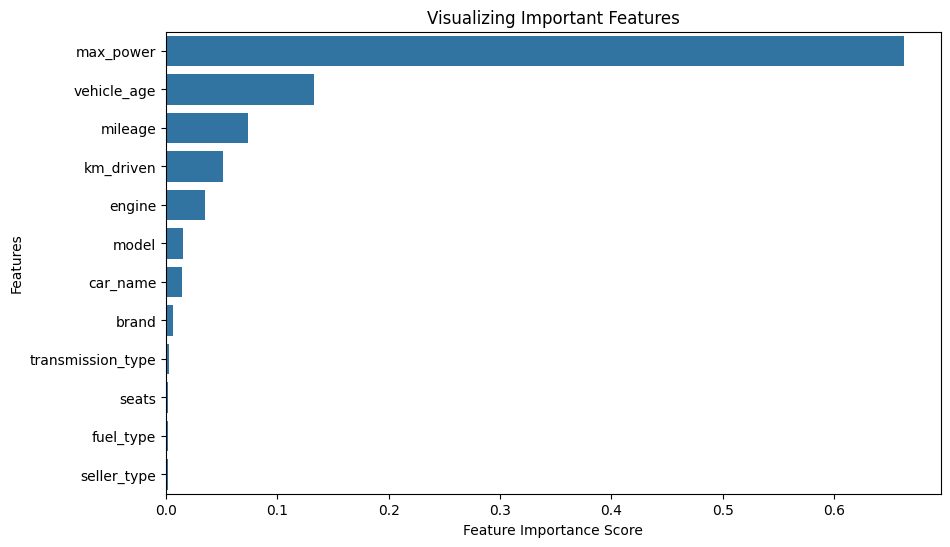

In [12]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

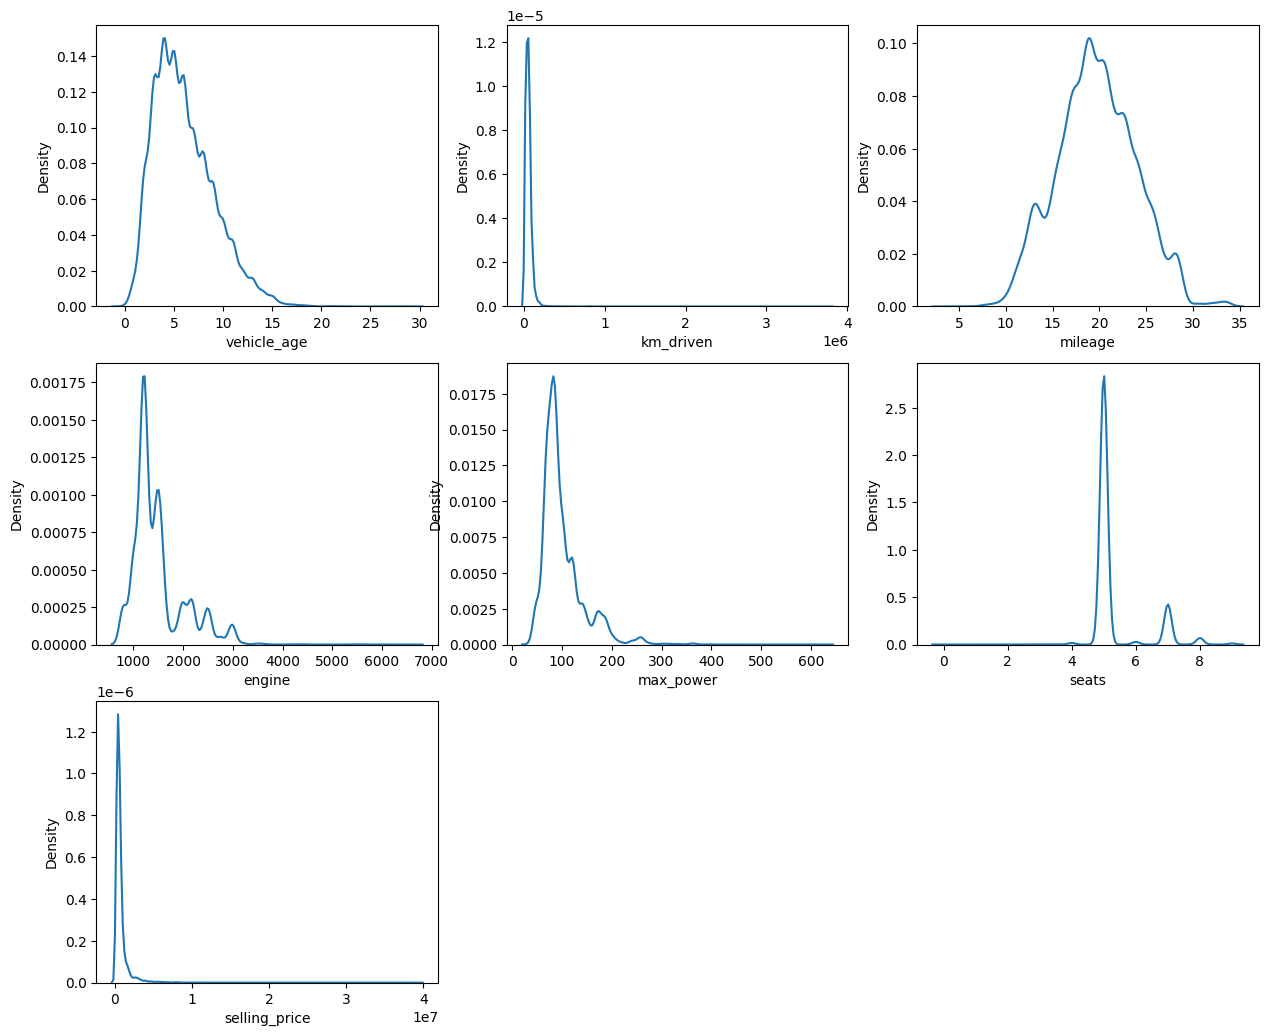

In [14]:
# Plot the density graphs of each of the numerical columns
num_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','selling_price']
plt.figure(figsize=(15, 30))
for i in range(len(num_columns)):
    plt.subplot(7, 3, i+1) 
    sns.kdeplot(data = df[num_columns[i]])

plt.show()

# Overall Insights

***Right-Skewed Variables:***

Variables like km_driven, selling_price, and max_power show strong right skewness, indicating a dominance of lower or typical values with a few outliers at the higher end. These variables may require transformation (e.g., log or square root) if used for modeling.

***Concentrated Distributions:***

Seats and vehicle_age are highly concentrated around typical values (e.g., 5 seats, 0-10 years). This suggests standard consumer preferences for newer vehicles and compact/mid-sized cars.

***Distinct Vehicle Segments:***

The multimodal nature of engine and the broad range of max_power suggest that the dataset includes a mix of vehicle classes (e.g., compact, SUV, performance).

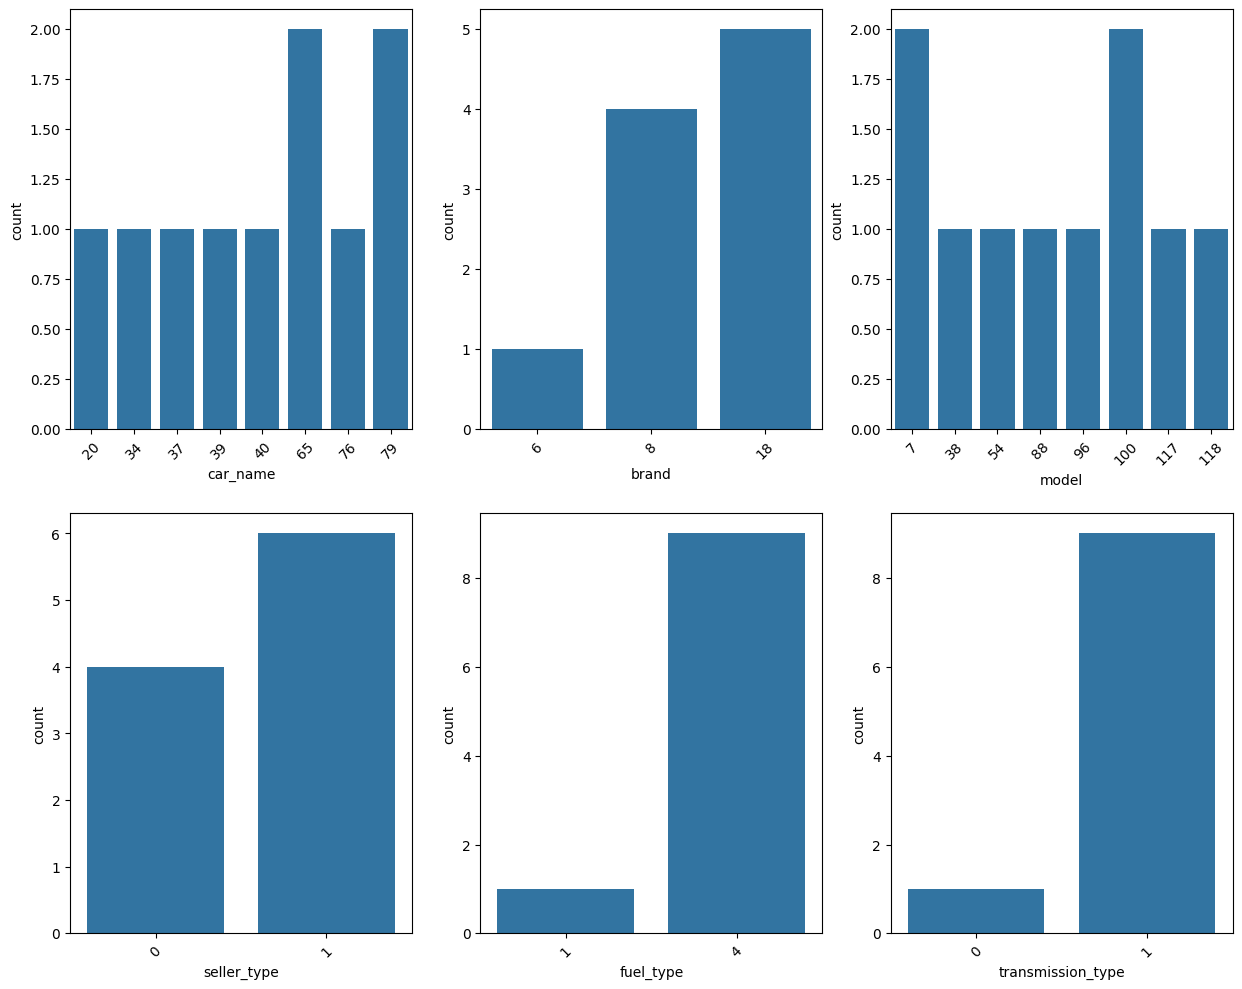

In [19]:
# Plot the countplots of each of the categorical columns
cat_columns = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
plt.figure(figsize=(15, 12))
for i in range(len(cat_columns)):
    plt.subplot(2, 3, i+1)
    plt.xticks(rotation = 45)
    sns.countplot(x = df[cat_columns[i]].head(10))

plt.show()

# Insights
The dataset skews toward manual transmission and petrol-fueled cars sold by individuals.
Maruti is the dominant brand, with the Maruti Alto and Hyundai Grand leading among models.
Diesel cars and automatic transmissions are underrepresented, potentially indicating limited availability or demand in the dataset.

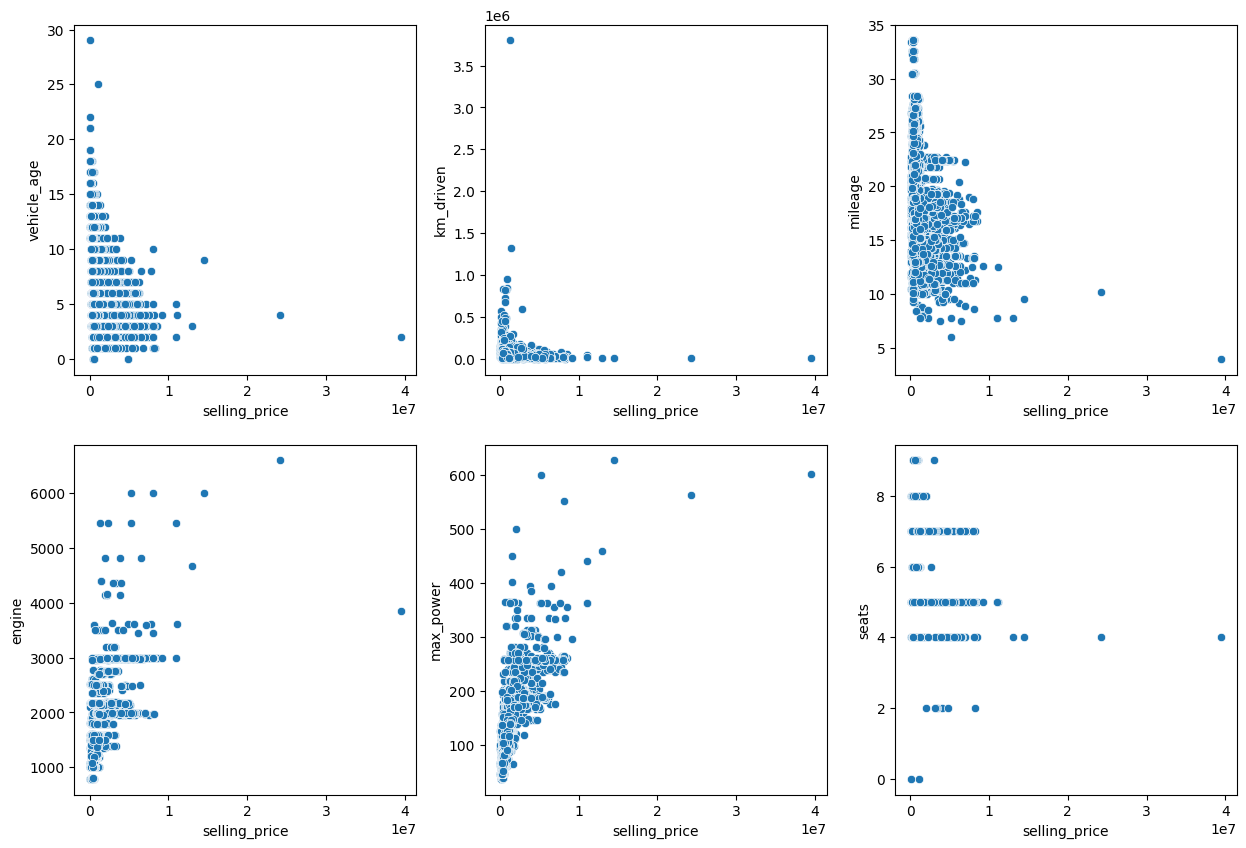

In [20]:
# Plot the relationship of each variable with the selling price (Target variable)
numerical_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

plt.figure(figsize=(15, 10))
for i in range(len(numerical_columns)):
    plt.subplot(2, 3, i+1) 
    sns.scatterplot(data = df, x = 'selling_price', y = numerical_columns[i])

plt.show()

# Interpretation of the Scatterplots
***1. Vehicle Age vs Selling Price***
***Observation:***Older vehicles tend to have lower selling prices, indicating an inverse relationship.

***Outliers:*** Some older vehicles show unusually high selling prices.

***2. Kilometers Driven vs Selling Price***
Observation: Cars with fewer kilometers driven are priced higher, while cars with high mileage are clustered at lower prices.

***Clusters:*** There’s a noticeable cluster at low prices and low mileage.

3.*** Mileage vs Selling Price***
***Observation:*** No strong correlation is visible. However, cars with lower mileage seem to cluster around average selling prices.

***4. Engine vs Selling Price***
***Observation:*** A positive relationship is visible: cars with larger engine capacities tend to have higher prices.

***5. Max Power vs Selling Price***
Observation: A positive trend is visible: higher power correlates with higher selling prices.

***Outliers:*** Some extreme outliers are present with very high power values.

***6. Seats vs Selling Price***
***Observation:*** No clear relationship is visible. Most cars have 4 or 5 seats, but prices don’t vary significantly based on seating capacity.